In [25]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [26]:
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),) # J an LxL matrix (here 40x40)
    for i in range(L):
        J[i,(i+1)%L]-=1.0 #defines interaction between nearest neighbours to be -1 (1st off diagonals all -1)
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states) #sum over i,j indicies. 

    return E
# calculate Ising energies
energies=ising_energies(states,L) # contains energy for 10,000 icing states 

In [27]:
#output first 10 energies
energies[0:10]
np.shape(energies)

(10000,)

In [28]:
statesold=states

In [29]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states) #outer product
statesold2=states
shape=states.shape # (10000,40,40)
print(shape)
states=states.reshape((shape[0],shape[1]*shape[2])) #reshape states into 10,000 by 40*40 =1600 matrix
# build final data set
Data=[states,energies]

(10000, 40, 40)


In [30]:
np.shape(states)

(10000, 1600)

In [31]:
np.shape(statesold)

(10000, 40)

In [32]:
np.sum([statesold2[0][i,(i+1)%40] for i in range(40)])

4

In [33]:
np.sum([statesold2[1][i,(i+1)%40] for i in range(40)])

0

In [34]:
statesold2[0]

array([[ 1, -1,  1, ...,  1,  1,  1],
       [-1,  1, -1, ..., -1, -1, -1],
       [ 1, -1,  1, ...,  1,  1,  1],
       ...,
       [ 1, -1,  1, ...,  1,  1,  1],
       [ 1, -1,  1, ...,  1,  1,  1],
       [ 1, -1,  1, ...,  1,  1,  1]])

In [35]:
# define number of samples
n_samples=5000
# define train and test data sets
X_train=Data[0][:n_samples]
Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
X_test=Data[0][n_samples:3*n_samples//2]
Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

In [36]:
np.shape(X_train[0])
Y_train[0]

-4.0

c:\Users\fayza\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.633e+00, tolerance: 3.052e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\fayza\AppData\Local\Temp\ipykernel_18204\4108049769.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)


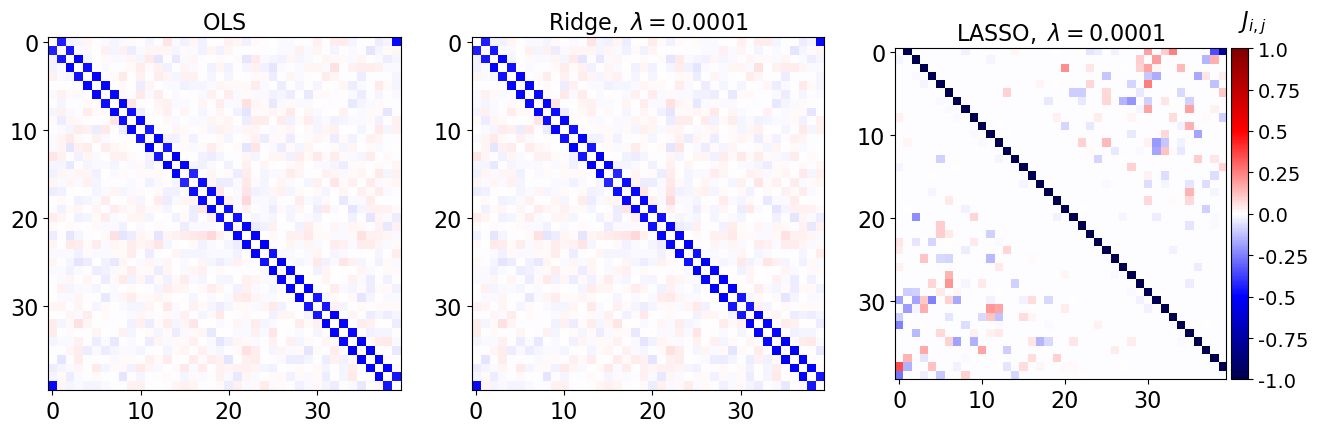

C:\Users\fayza\AppData\Local\Temp\ipykernel_18204\4108049769.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)


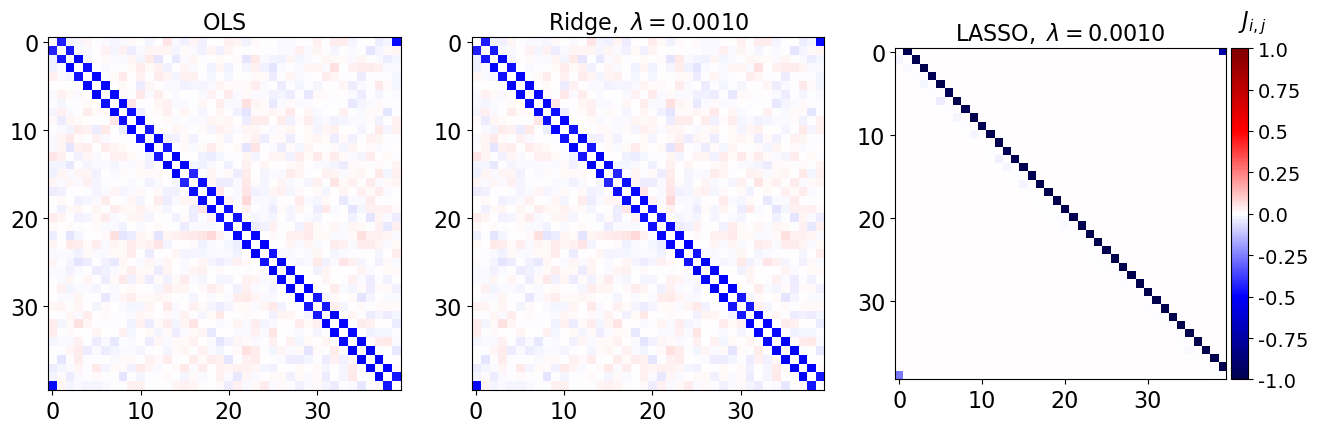

C:\Users\fayza\AppData\Local\Temp\ipykernel_18204\4108049769.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)


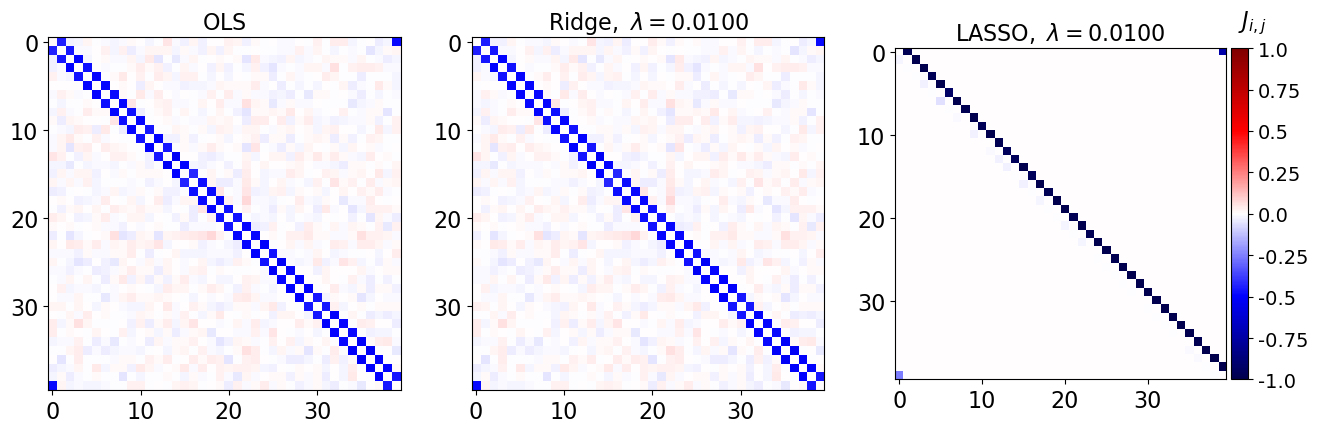

C:\Users\fayza\AppData\Local\Temp\ipykernel_18204\4108049769.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)


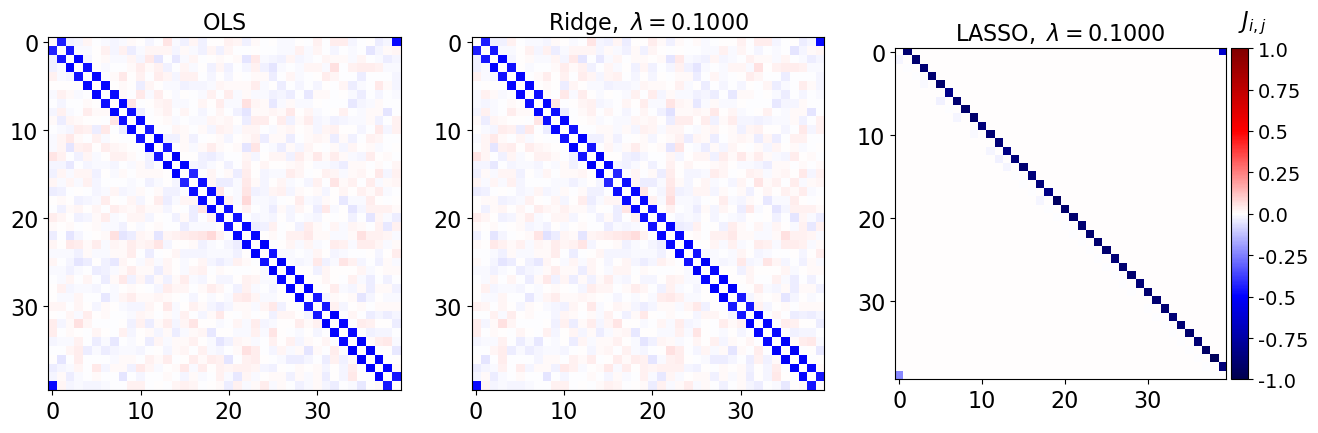

C:\Users\fayza\AppData\Local\Temp\ipykernel_18204\4108049769.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)


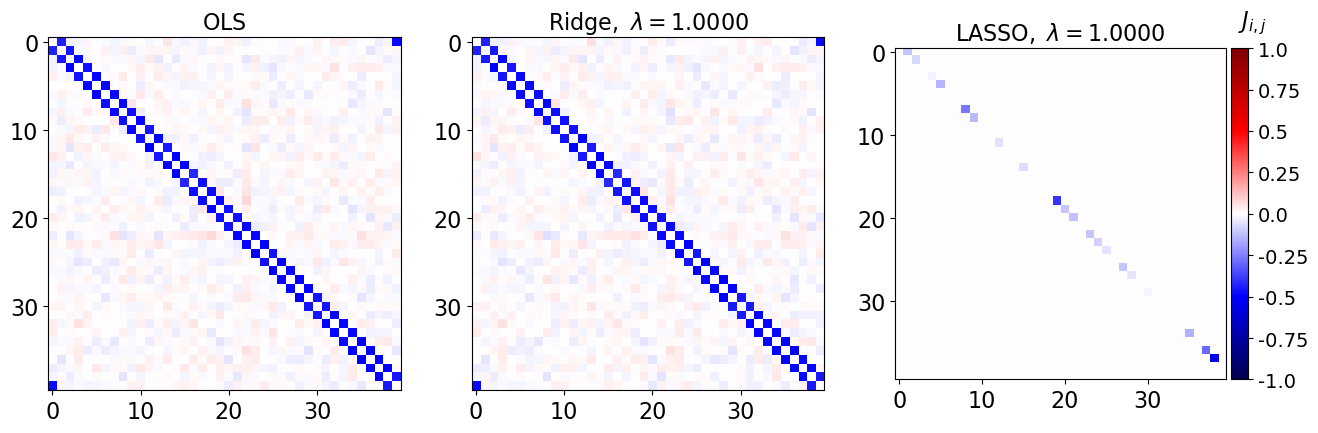

C:\Users\fayza\AppData\Local\Temp\ipykernel_18204\4108049769.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)


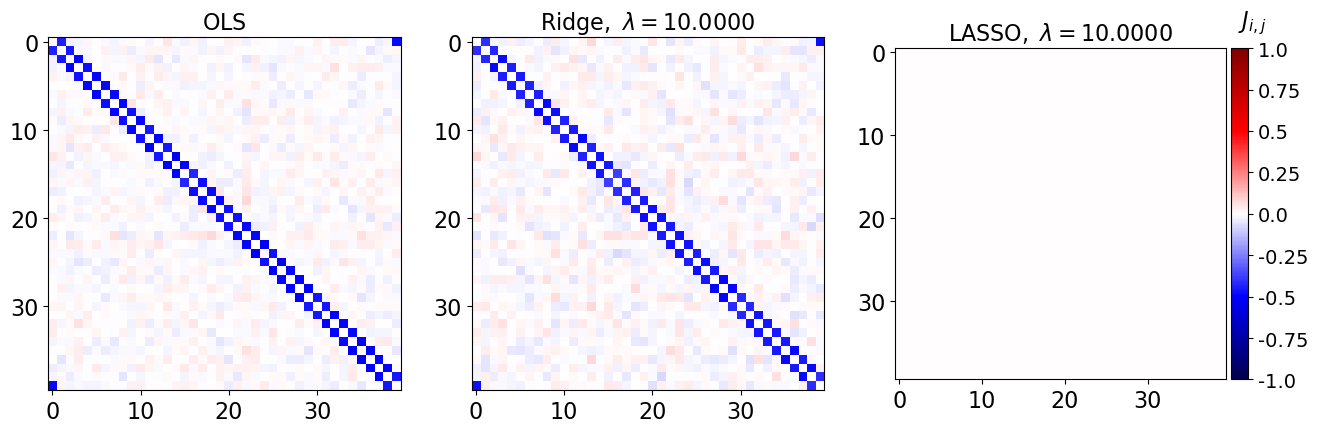

C:\Users\fayza\AppData\Local\Temp\ipykernel_18204\4108049769.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)


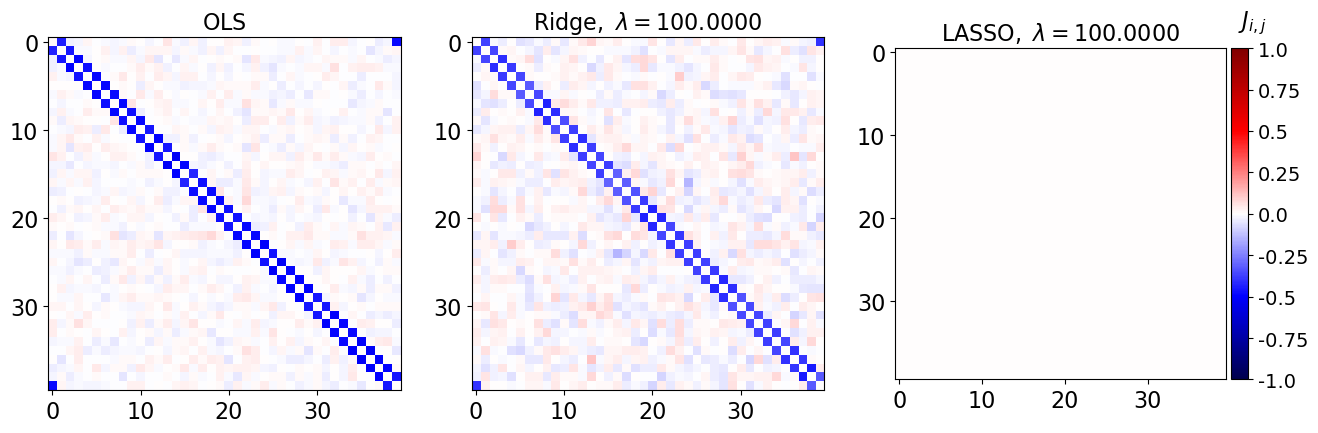

C:\Users\fayza\AppData\Local\Temp\ipykernel_18204\4108049769.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)


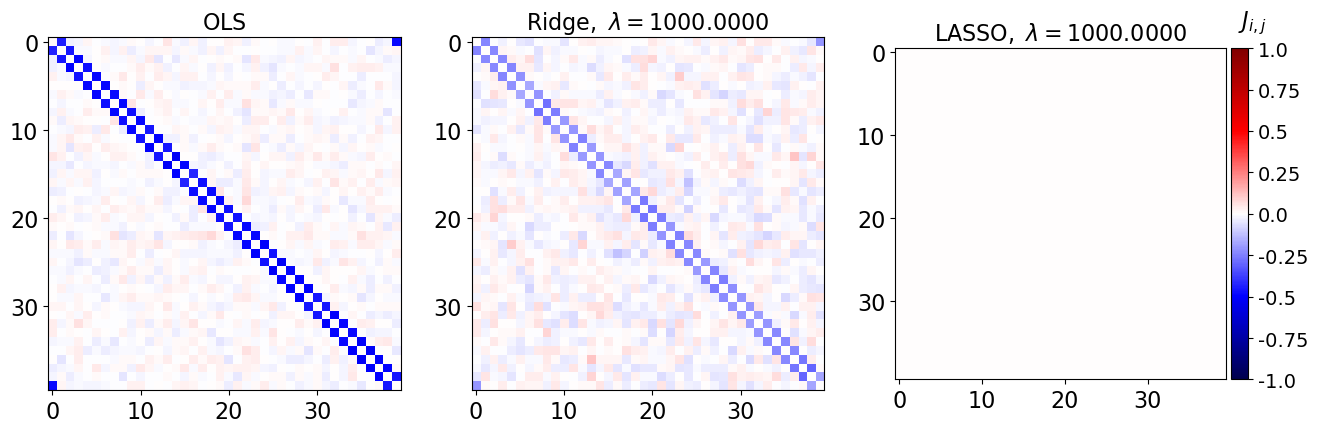

C:\Users\fayza\AppData\Local\Temp\ipykernel_18204\4108049769.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)


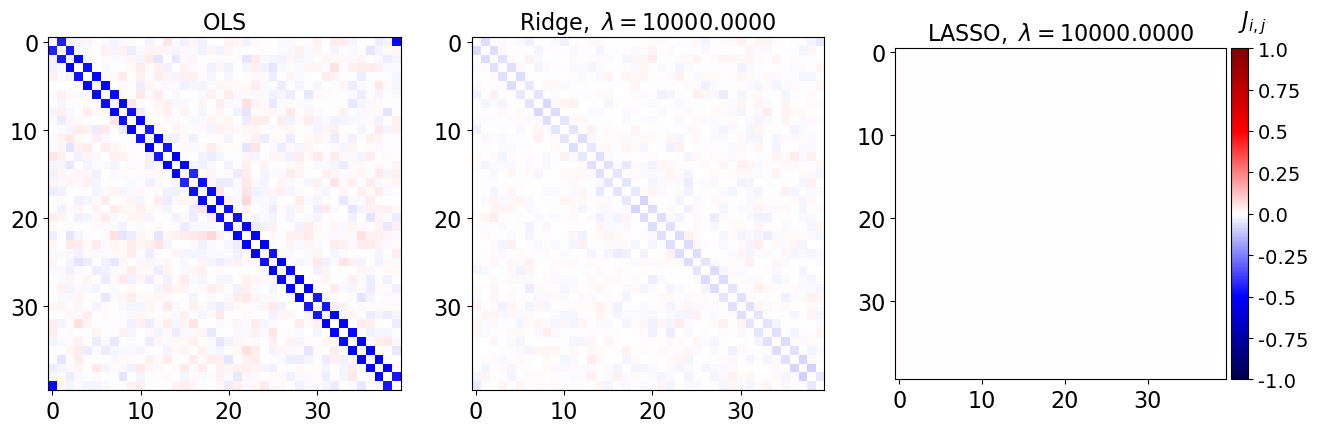

C:\Users\fayza\AppData\Local\Temp\ipykernel_18204\4108049769.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)


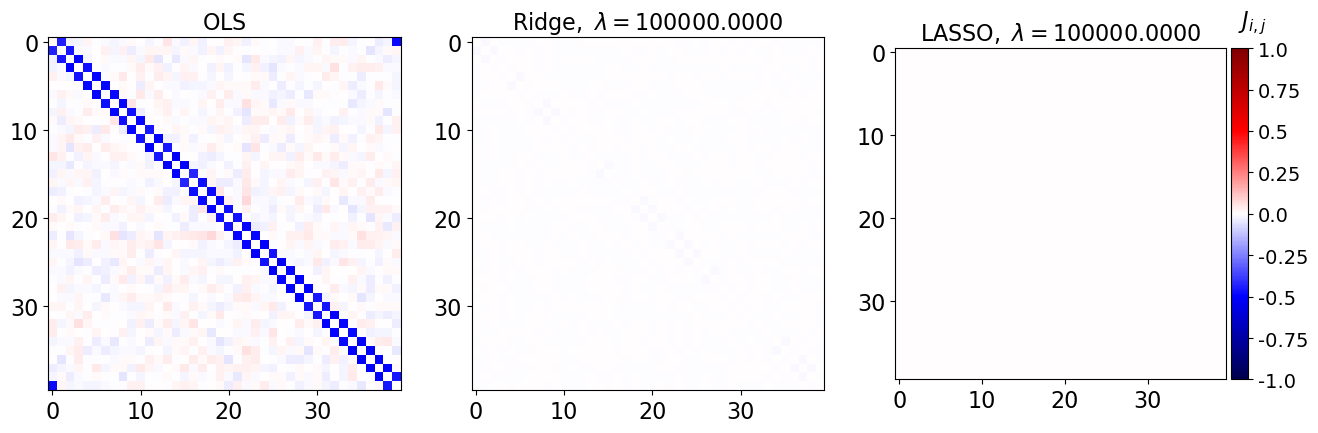

In [57]:
#define number of samples
n_samples=750
# define train and test data sets
X_train=Data[0][:n_samples]
Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
X_test=Data[0][n_samples:3*n_samples//2]
Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

np.shape(X_train[0])
Y_train[0]

%matplotlib inline
from sklearn.metrics import mean_squared_error

# set up Lasso and Ridge Regression models
leastsq=linear_model.LinearRegression()
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()

# define error lists
train_errors_leastsq = []
test_errors_leastsq = []

train_errors_ridge = []
test_errors_ridge = []

train_errors_lasso = []
test_errors_lasso = []

#define E_train, E_test lists
E_train_leastsq=[]
E_test_leastsq=[]

E_train_ridge=[]
E_test_ridge=[]

E_train_lasso=[]
E_test_lasso=[]

# set refularisations trength values
lmbdas = np.logspace(-4, 5, 10)

#Initialize coeffficients for ridge regression and Lasso
coefs_leastsq = []
coefs_ridge = []
coefs_lasso=[]

for lmbda in lmbdas:
    
    ### ordinary least squares
    leastsq.fit(X_train, Y_train) # fit model 
    coefs_leastsq.append(leastsq.coef_) # store weights
    #
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_leastsq.append(leastsq.score(X_train, Y_train))
    test_errors_leastsq.append(leastsq.score(X_test,Y_test))
    #
    # ES2 Q2: want E_train, E_test instead
    Y_pred_train=leastsq.predict(X_train) # predict y-values based on model fitted 
    E_train_leastsq.append(mean_squared_error(Y_train,Y_pred_train))
    #
    Y_pred_test=leastsq.predict(X_test) # predict y-values based on model fitted 
    E_test_leastsq.append(mean_squared_error(Y_test,Y_pred_test))


    ### apply Ridge regression
    ridge.set_params(alpha=lmbda) # set regularisation parameter
    ridge.fit(X_train, Y_train) # fit model 
    coefs_ridge.append(ridge.coef_) # store weights
    #
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, Y_train))
    test_errors_ridge.append(ridge.score(X_test,Y_test))
    #
    # ES2 Q2: want E_train, E_test instead
    Y_pred_train=ridge.predict(X_train) # predict y-values based on model fitted 
    E_train_ridge.append(mean_squared_error(Y_train,Y_pred_train))
    #
    Y_pred_test=ridge.predict(X_test) # predict y-values based on model fitted 
    E_test_ridge.append(mean_squared_error(Y_test,Y_pred_test))

    ### apply Lasso regression
    lasso.set_params(alpha=lmbda) # set regularisation parameter
    lasso.fit(X_train, Y_train) # fit model
    coefs_lasso.append(lasso.coef_) # store weights
    #
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_lasso.append(lasso.score(X_train, Y_train))
    test_errors_lasso.append(lasso.score(X_test,Y_test))
    #
    # ES2 Q2: want E_train, E_test instead
    Y_pred_train=lasso.predict(X_train) # predict y-values based on model fitted 
    E_train_lasso.append(mean_squared_error(Y_train,Y_pred_train))
    #
    Y_pred_test=lasso.predict(X_test) # predict y-values based on model fitted 
    E_test_lasso.append(mean_squared_error(Y_test,Y_pred_test))

    ### plot Ising interaction J
    J_leastsq=np.array(leastsq.coef_).reshape((L,L))
    J_ridge=np.array(ridge.coef_).reshape((L,L))
    J_lasso=np.array(lasso.coef_).reshape((L,L))

    cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')

    fig, axarr = plt.subplots(nrows=1, ncols=3)
    
    axarr[0].imshow(J_leastsq,**cmap_args)
    axarr[0].set_title('$\\mathrm{OLS}$',fontsize=16)
    axarr[0].tick_params(labelsize=16)
    
    axarr[1].imshow(J_ridge,**cmap_args)
    axarr[1].set_title('$\\mathrm{Ridge},\ \\lambda=%.4f$' %(lmbda),fontsize=16)
    axarr[1].tick_params(labelsize=16)
    
    im=axarr[2].imshow(J_lasso,**cmap_args)
    axarr[2].set_title('$\\mathrm{LASSO},\ \\lambda=%.4f$' %(lmbda),fontsize=16)
    axarr[2].tick_params(labelsize=16)
    
    divider = make_axes_locatable(axarr[2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(im, cax=cax)

    cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)
    cbar.set_label('$J_{i,j}$',labelpad=-40, y=1.12,fontsize=16,rotation=0)
    
    fig.subplots_adjust(right=2.0)
    
    plt.show()


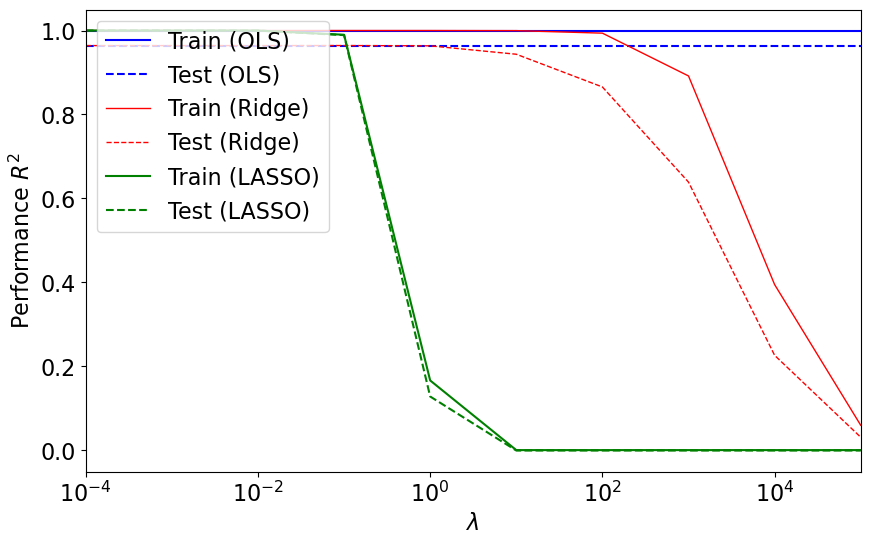

In [58]:
# Plot our performance on both the training and test data
plt.semilogx(lmbdas, train_errors_leastsq, 'b',label='Train (OLS)')
plt.semilogx(lmbdas, test_errors_leastsq,'--b',label='Test (OLS)')
plt.semilogx(lmbdas, train_errors_ridge,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lmbdas, test_errors_ridge,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lmbdas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(lmbdas, test_errors_lasso, '--g',label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper left',fontsize=16)
#plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Performance $R^2$',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

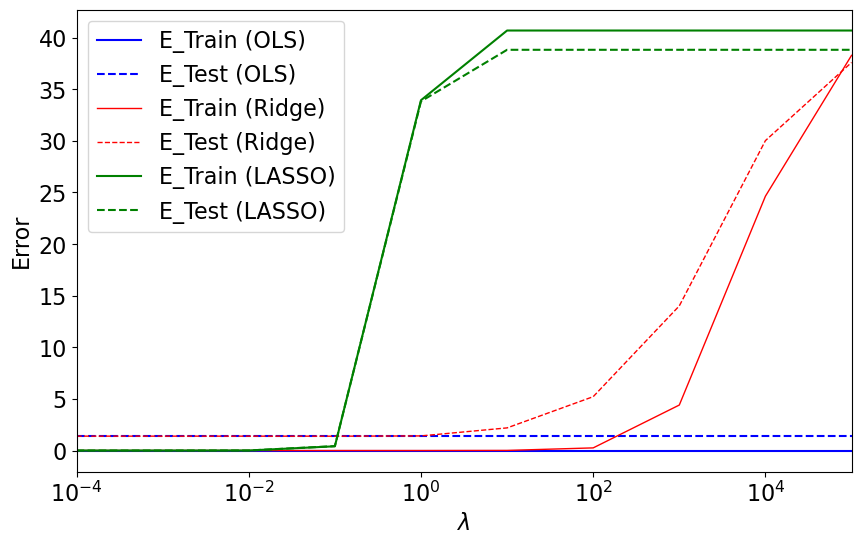

In [59]:
#Plot our performance using E_test and E_train
plt.semilogx(lmbdas, E_train_leastsq, 'b',label='E_Train (OLS)')
plt.semilogx(lmbdas, E_test_leastsq,'--b',label='E_Test (OLS)')
plt.semilogx(lmbdas, E_train_ridge,'r',label='E_Train (Ridge)',linewidth=1)
plt.semilogx(lmbdas, E_test_ridge,'--r',label='E_Test (Ridge)',linewidth=1)
plt.semilogx(lmbdas, E_train_lasso, 'g',label='E_Train (LASSO)')
plt.semilogx(lmbdas, E_test_lasso, '--g',label='E_Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper left',fontsize=16)
#plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Error',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

c:\Users\fayza\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.927e-01, tolerance: 4.400e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\fayza\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.398e+00, tolerance: 4.400e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\fayza\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.739e+00, toleranc

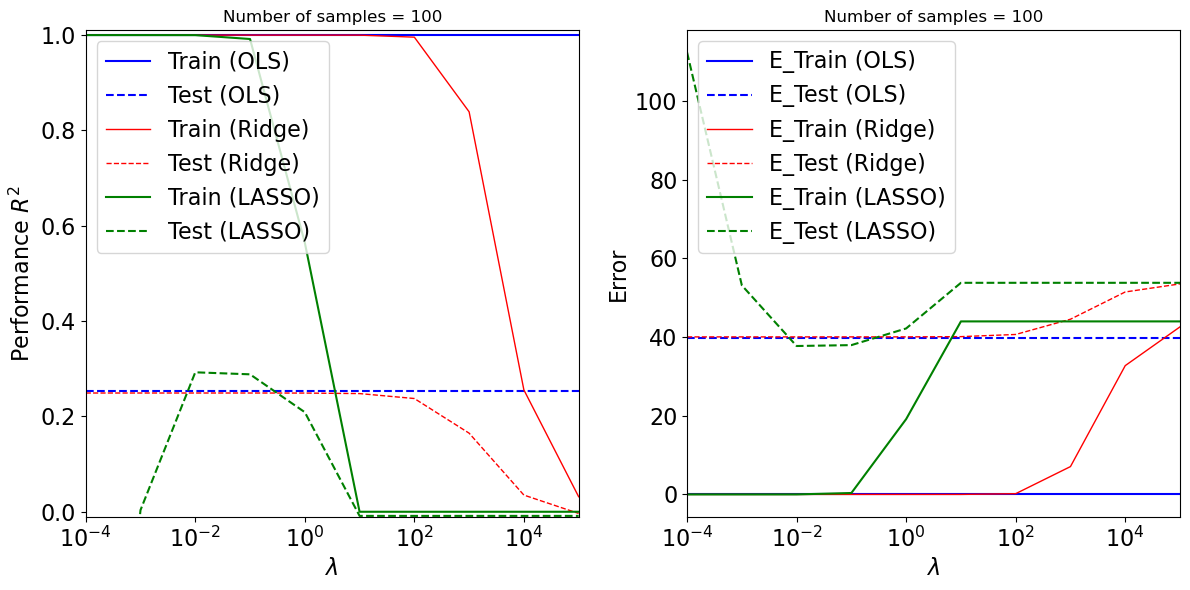

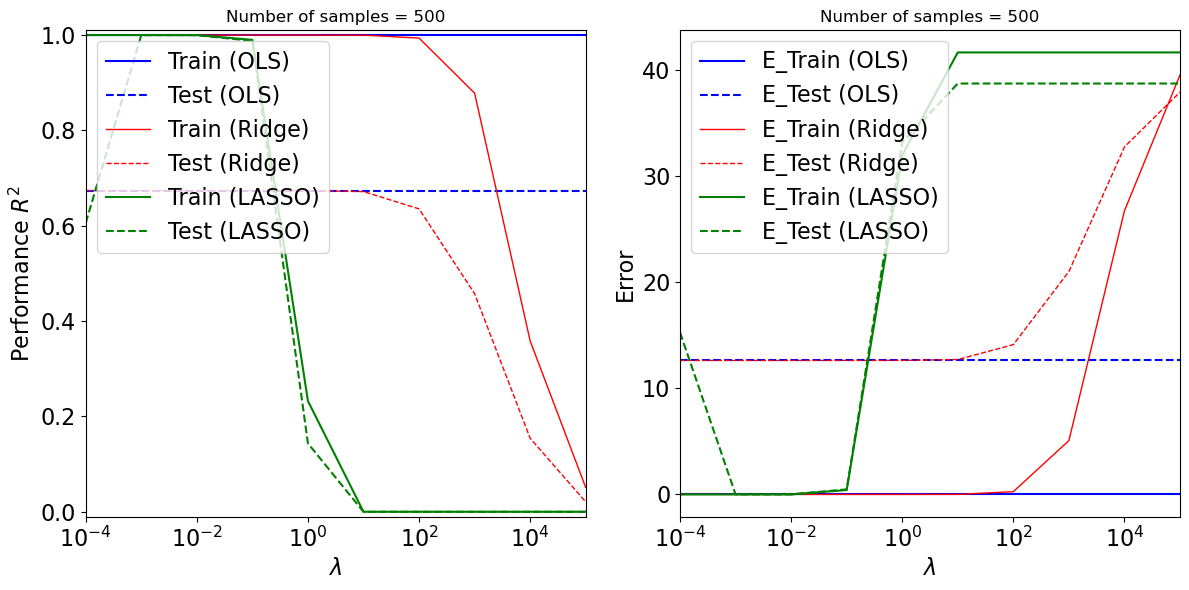

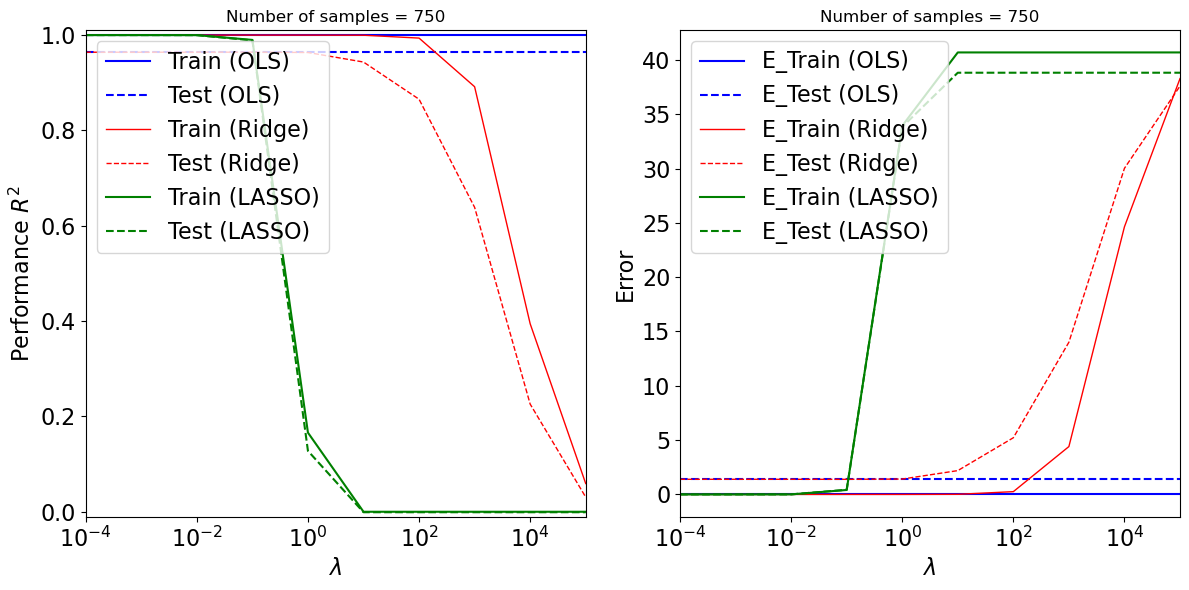

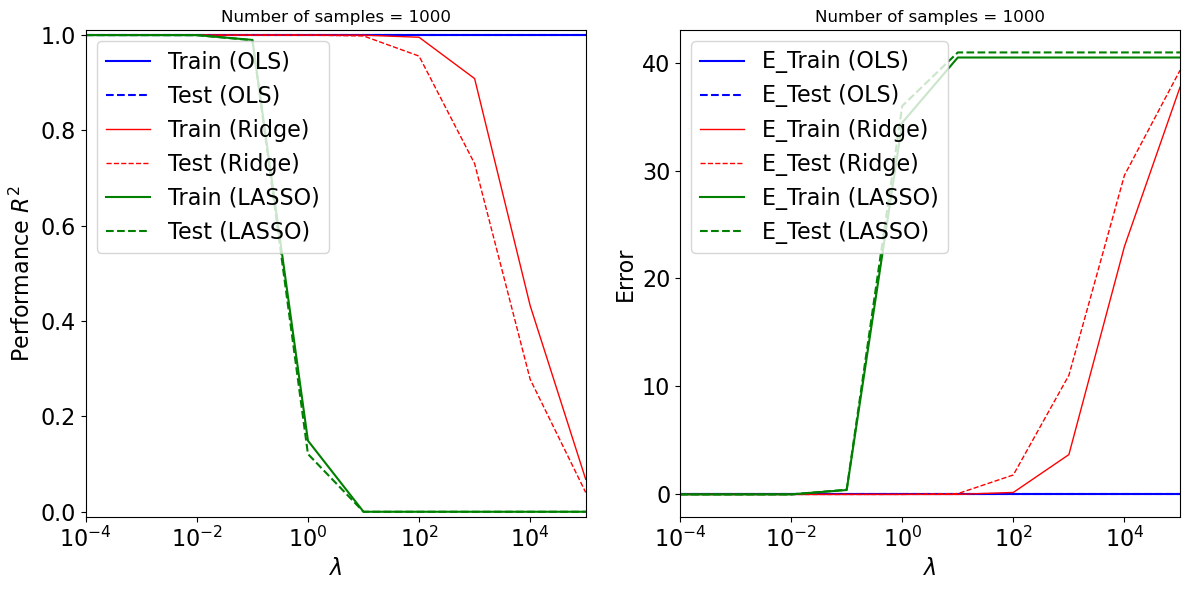

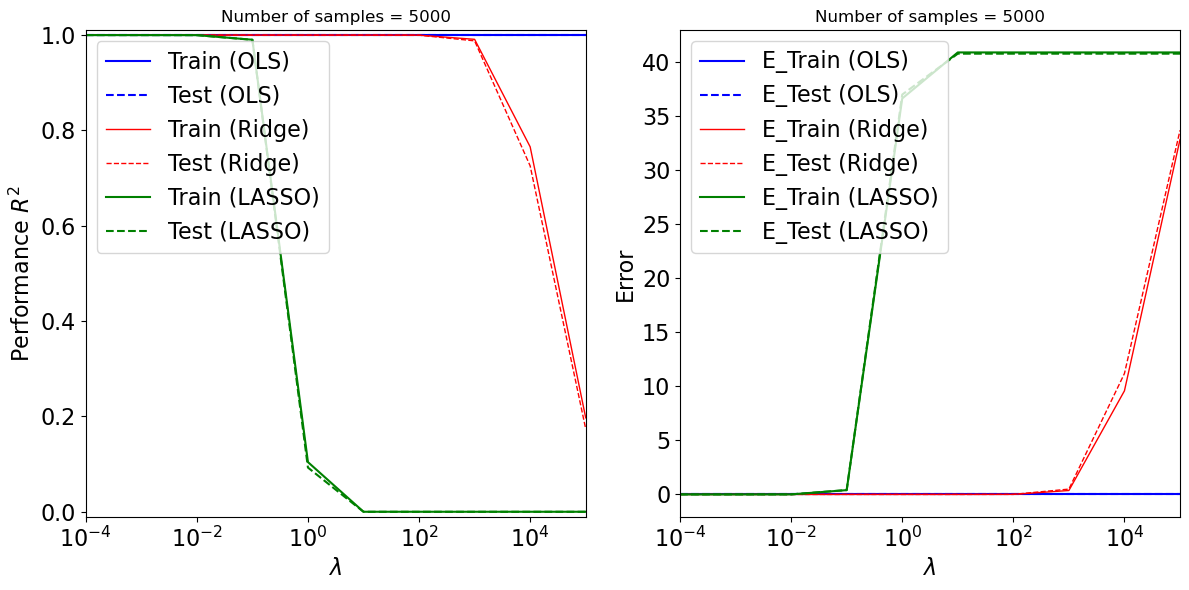

In [55]:
for n_samples in [100,500,750,1000,5000]:
    # define train and test data sets
    X_train=Data[0][:n_samples]
    Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
    X_test=Data[0][n_samples:3*n_samples//2]
    Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

    np.shape(X_train[0])
    Y_train[0]

    %matplotlib inline
    from sklearn.metrics import mean_squared_error

    # set up Lasso and Ridge Regression models
    leastsq=linear_model.LinearRegression()
    ridge=linear_model.Ridge()
    lasso = linear_model.Lasso()

    # define error lists
    train_errors_leastsq = []
    test_errors_leastsq = []

    train_errors_ridge = []
    test_errors_ridge = []

    train_errors_lasso = []
    test_errors_lasso = []

    #define E_train, E_test lists
    E_train_leastsq=[]
    E_test_leastsq=[]

    E_train_ridge=[]
    E_test_ridge=[]

    E_train_lasso=[]
    E_test_lasso=[]

    # set refularisations trength values
    lmbdas = np.logspace(-4, 5, 10)

    #Initialize coeffficients for ridge regression and Lasso
    coefs_leastsq = []
    coefs_ridge = []
    coefs_lasso=[]

    for lmbda in lmbdas:
        
        ### ordinary least squares
        leastsq.fit(X_train, Y_train) # fit model 
        coefs_leastsq.append(leastsq.coef_) # store weights
        #
        # use the coefficient of determination R^2 as the performance of prediction.
        train_errors_leastsq.append(leastsq.score(X_train, Y_train))
        test_errors_leastsq.append(leastsq.score(X_test,Y_test))
        #
        # ES2 Q2: want E_train, E_test instead
        Y_pred_train=leastsq.predict(X_train) # predict y-values based on model fitted 
        E_train_leastsq.append(mean_squared_error(Y_train,Y_pred_train))
        #
        Y_pred_test=leastsq.predict(X_test) # predict y-values based on model fitted 
        E_test_leastsq.append(mean_squared_error(Y_test,Y_pred_test))


        ### apply Ridge regression
        ridge.set_params(alpha=lmbda) # set regularisation parameter
        ridge.fit(X_train, Y_train) # fit model 
        coefs_ridge.append(ridge.coef_) # store weights
        #
        # use the coefficient of determination R^2 as the performance of prediction.
        train_errors_ridge.append(ridge.score(X_train, Y_train))
        test_errors_ridge.append(ridge.score(X_test,Y_test))
        #
        # ES2 Q2: want E_train, E_test instead
        Y_pred_train=ridge.predict(X_train) # predict y-values based on model fitted 
        E_train_ridge.append(mean_squared_error(Y_train,Y_pred_train))
        #
        Y_pred_test=ridge.predict(X_test) # predict y-values based on model fitted 
        E_test_ridge.append(mean_squared_error(Y_test,Y_pred_test))

        ### apply Lasso regression
        lasso.set_params(alpha=lmbda) # set regularisation parameter
        lasso.fit(X_train, Y_train) # fit model
        coefs_lasso.append(lasso.coef_) # store weights
        #
        # use the coefficient of determination R^2 as the performance of prediction.
        train_errors_lasso.append(lasso.score(X_train, Y_train))
        test_errors_lasso.append(lasso.score(X_test,Y_test))
        #
        # ES2 Q2: want E_train, E_test instead
        Y_pred_train=lasso.predict(X_train) # predict y-values based on model fitted 
        E_train_lasso.append(mean_squared_error(Y_train,Y_pred_train))
        #
        Y_pred_test=lasso.predict(X_test) # predict y-values based on model fitted 
        E_test_lasso.append(mean_squared_error(Y_test,Y_pred_test))

        """### plot Ising interaction J
        J_leastsq=np.array(leastsq.coef_).reshape((L,L))
        J_ridge=np.array(ridge.coef_).reshape((L,L))
        J_lasso=np.array(lasso.coef_).reshape((L,L))

        cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')

        fig, axarr = plt.subplots(nrows=1, ncols=3)
        
        axarr[0].imshow(J_leastsq,**cmap_args)
        axarr[0].set_title('$\\mathrm{OLS}$',fontsize=16)
        axarr[0].tick_params(labelsize=16)
        
        axarr[1].imshow(J_ridge,**cmap_args)
        axarr[1].set_title('$\\mathrm{Ridge},\ \\lambda=%.4f$' %(lmbda),fontsize=16)
        axarr[1].tick_params(labelsize=16)
        
        im=axarr[2].imshow(J_lasso,**cmap_args)
        axarr[2].set_title('$\\mathrm{LASSO},\ \\lambda=%.4f$' %(lmbda),fontsize=16)
        axarr[2].tick_params(labelsize=16)
        
        divider = make_axes_locatable(axarr[2])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar=fig.colorbar(im, cax=cax)
    
        cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)
        cbar.set_label('$J_{i,j}$',labelpad=-40, y=1.12,fontsize=16,rotation=0)
        
        fig.subplots_adjust(right=2.0)
        
        plt.show()"""

    ###plots for each of the n_samples
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    # Plot our performance on both the training and test data
    ax[0].semilogx(lmbdas, train_errors_leastsq, 'b',label='Train (OLS)')
    ax[0].semilogx(lmbdas, test_errors_leastsq,'--b',label='Test (OLS)')
    ax[0].semilogx(lmbdas, train_errors_ridge,'r',label='Train (Ridge)',linewidth=1)
    ax[0].semilogx(lmbdas, test_errors_ridge,'--r',label='Test (Ridge)',linewidth=1)
    ax[0].semilogx(lmbdas, train_errors_lasso, 'g',label='Train (LASSO)')
    ax[0].semilogx(lmbdas, test_errors_lasso, '--g',label='Test (LASSO)')

    

    #plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
    #           linewidth=3, label='Optimum on test')
    ax[0].legend(loc='upper left',fontsize=16)
    ax[0].set_ylim([-0.01, 1.01])
    ax[0].set_xlim([min(lmbdas), max(lmbdas)])
    ax[0].set_xlabel(r'$\lambda$',fontsize=16)
    ax[0].set_ylabel('Performance $R^2$',fontsize=16)
    ax[0].set_title(f'Number of samples = {n_samples}')
    ax[0].tick_params(labelsize=16)
    
    #Plot our performance using E_test and E_train
    ax[1].semilogx(lmbdas, E_train_leastsq, 'b',label='E_Train (OLS)')
    ax[1].semilogx(lmbdas, E_test_leastsq,'--b',label='E_Test (OLS)')
    ax[1].semilogx(lmbdas, E_train_ridge,'r',label='E_Train (Ridge)',linewidth=1)
    ax[1].semilogx(lmbdas, E_test_ridge,'--r',label='E_Test (Ridge)',linewidth=1)
    ax[1].semilogx(lmbdas, E_train_lasso, 'g',label='E_Train (LASSO)')
    ax[1].semilogx(lmbdas, E_test_lasso, '--g',label='E_Test (LASSO)')

    #plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
    #           linewidth=3, label='Optimum on test')
    ax[1].legend(loc='upper left',fontsize=16)
    ax[1].set_xlim([min(lmbdas), max(lmbdas)])
    ax[1].set_xlabel(r'$\lambda$',fontsize=16)
    ax[1].set_ylabel('Error',fontsize=16)
    ax[1].set_title(f'Number of samples = {n_samples}')
    ax[1].tick_params(labelsize=16)

    fig = plt.gcf()
    plt.tight_layout(w_pad=2)
    #fig.set_size_inches(10.0, 6.0)